Explained variance by each component: [0.53535288 0.30701328]
Cumulative explained variance: [0.53535288 0.84236616]


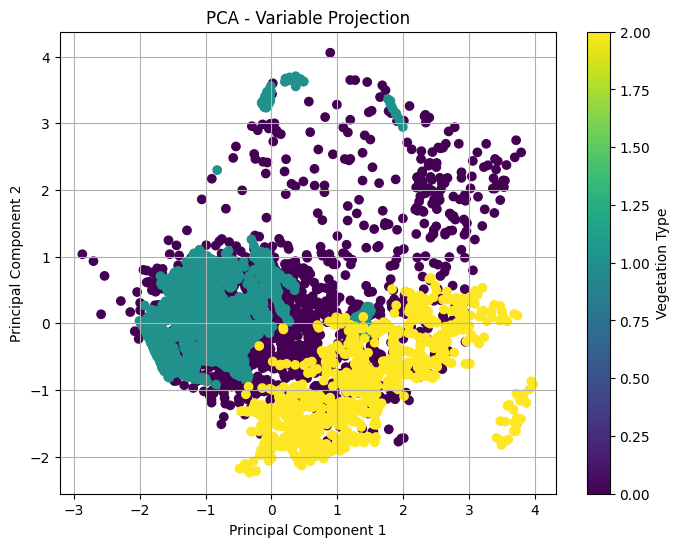

Principal components:
[[ 0.5430234   0.68191522  0.49001758]
 [-0.65618602 -0.01953119  0.75434636]]


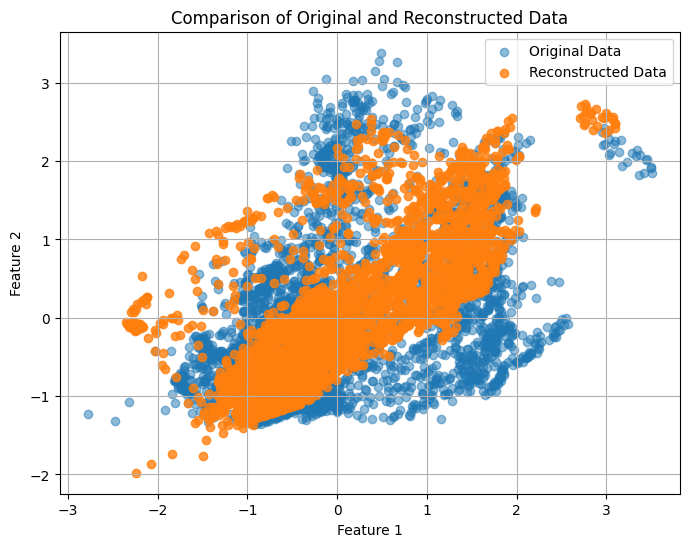

In [3]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.preprocessing import LabelEncoder, StandardScaler  
from sklearn.decomposition import PCA 
import DataClass as dc 

# Load the data
dt2 = pd.read_csv(dc.CSV_PATH_2)  
dt5 = pd.read_csv(dc.CSV_PATH_5)  
dt7 = pd.read_csv(dc.CSV_PATH_7)

data = pd.concat([dt2, dt5, dt7], ignore_index=True)

# Encode VEGETATION_TYPE into numerical values
label_encoder = LabelEncoder()
data[dc.VEGETATION_TYPE] = label_encoder.fit_transform(data[dc.VEGETATION_TYPE])

# Feature selection
X = data[[dc.ALTITUDE, dc.HORIZONTAL_DISTANCE_TO_ROADWAYS, dc.HORIZONTAL_DISTANCE_TO_FIRE_POINTS]]
Y = data[dc.VEGETATION_TYPE]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
X_pca = pca.fit_transform(X_scaled)

# Explained variance
print("Explained variance by each component:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", np.cumsum(pca.explained_variance_ratio_))

# Plot the 2D projection of the principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Variable Projection')
plt.colorbar(label='Vegetation Type')
plt.grid(True)
plt.show()

# Display principal components
print("Principal components:")
print(pca.components_)

# Reconstruct the data after dimensionality reduction
X_reconstructed = pca.inverse_transform(X_pca)

# Compare original data with reconstructed data
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.5, label="Original Data")
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], alpha=0.8, label="Reconstructed Data")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Comparison of Original and Reconstructed Data')
plt.grid(True)
plt.show()
